**Dataset description** : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

Import neccesary libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import ydata_profiling as ydata

print(f" Libraries successfully imported")

 Libraries successfully imported


Import the data set 

In [5]:
data = pd.read_csv('African_crises_dataset.csv')
data

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


Basic data exploration

In [7]:
#Dsiplay first 5 rows 
data.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

Statistical analysis for numerical data

In [11]:
data.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


**Pandas Profiling Report**

In [15]:
from ydata_profiling import ProfileReport

In [17]:
profile = ProfileReport(data, title="Systemic Crisis Dataset Report", explorative=True)
profile.to_file("systemic_crisis_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Check and Handle Missing data

In [20]:
data.isnull().sum() 

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

The data has no missing value

**Check and handle duplicates**

In [29]:
duplicates = data.duplicated().sum()
duplicates

0

The data has no duplicate values

**Check and handle outliers**

In [45]:
# Using IQR method for handling outliers in 'Inflation Rate'
Q1 = data['inflation_annual_cpi'].quantile(0.25)
Q3 = data['inflation_annual_cpi'].quantile(0.75)
IQR = Q3 - Q1
data_df = data[~((data['inflation_annual_cpi'] < (Q1 - 1.5 * IQR)) | (data['inflation_annual_cpi'] > (Q3 + 1.5 * IQR)))]
data_df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


**Encoding Categorical Features**

#Encode Categorical Features
data = pd.get_dummies(data, drop_first=True)
data

**Selecting Target and Features**

In [62]:
# Selecting Target and Features
X = data.drop('systemic_crisis', axis=1)  
y = data['systemic_crisis']               

**Feature Engineering**

In [64]:
#Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
#Evaluate Model Performance
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[195   0]
 [  0  17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        17

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


Accuracy Score: 1.0

ROC AUC Score: 1.0


In [78]:
importances

array([2.86288305e-02, 1.21225980e-01, 1.05137514e-01, 9.36767005e-03,
       2.65537775e-02, 3.35107821e-03, 9.48175611e-02, 3.66113061e-03,
       1.22164818e-02, 1.35785966e-02, 1.21359077e-02, 1.54974309e-03,
       2.50954206e-03, 9.12392172e-03, 8.50998579e-03, 1.66410445e-03,
       2.24102652e-03, 6.43154752e-03, 1.84917388e-03, 5.75622802e-03,
       1.56514171e-03, 1.31002386e-02, 7.28848463e-03, 1.44056313e-02,
       8.97105700e-03, 1.01438459e-03, 1.23881841e-02, 3.37625771e-03,
       2.18308159e-04, 5.90375409e-03, 5.80343802e-03, 1.83773075e-03,
       1.18679141e-03, 8.90356873e-03, 4.43727228e-01])

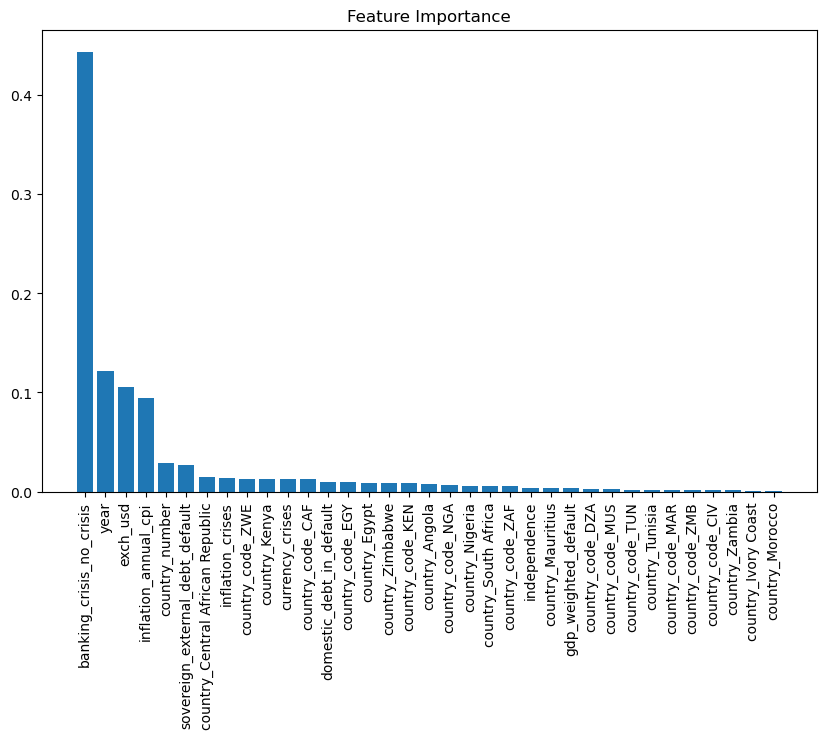

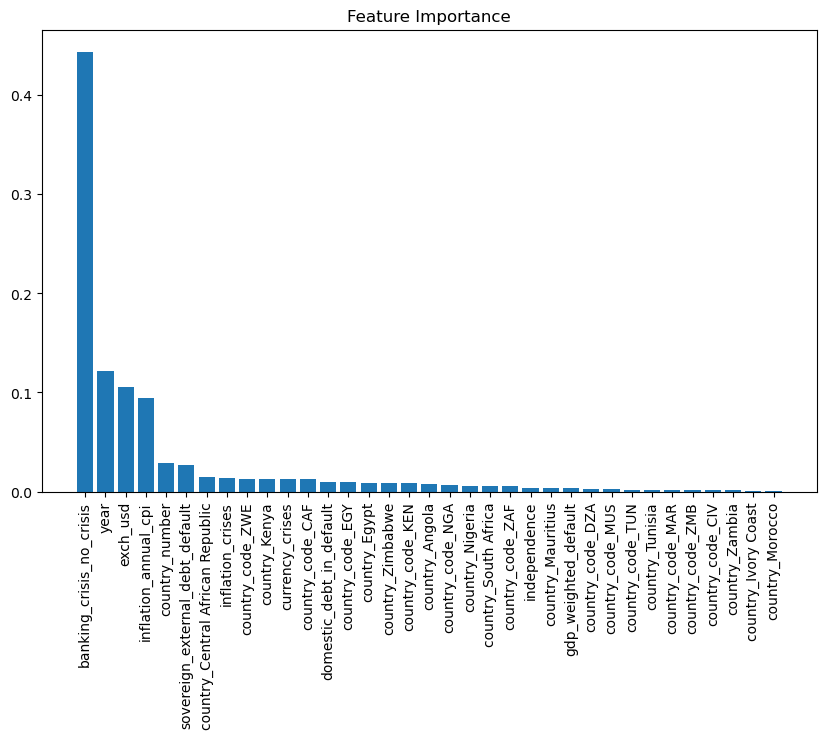

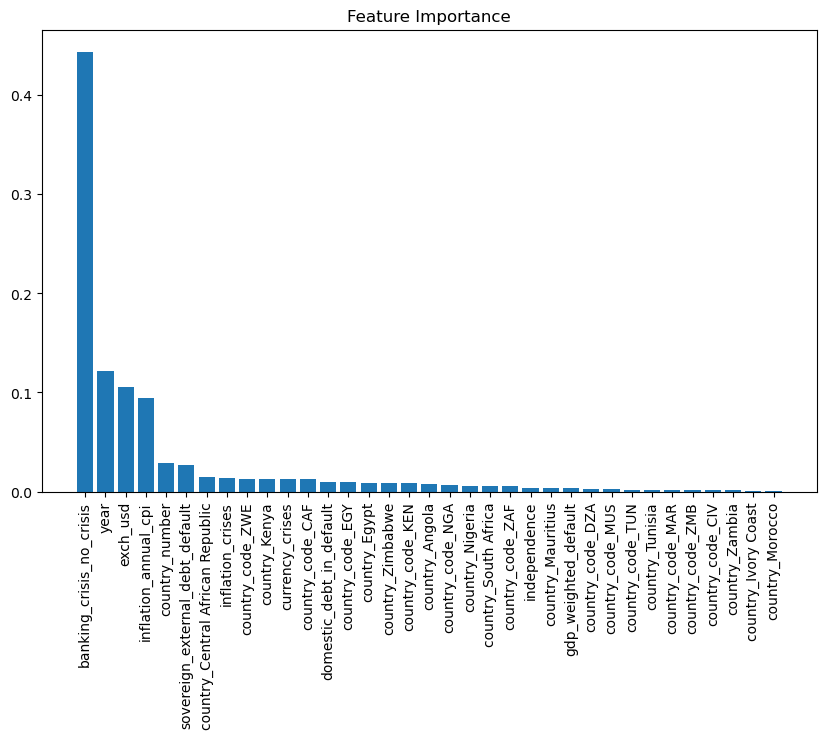

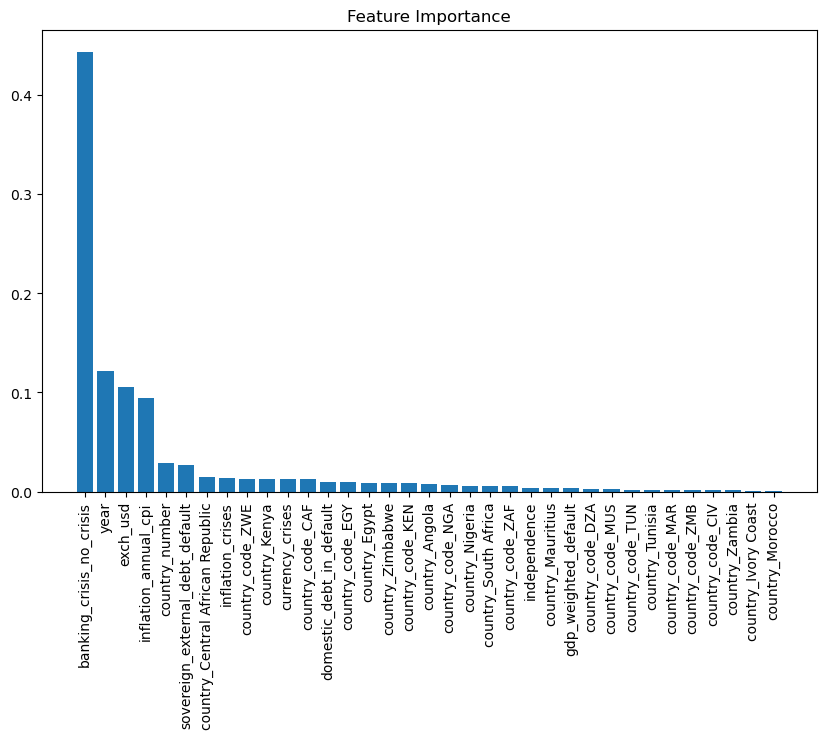

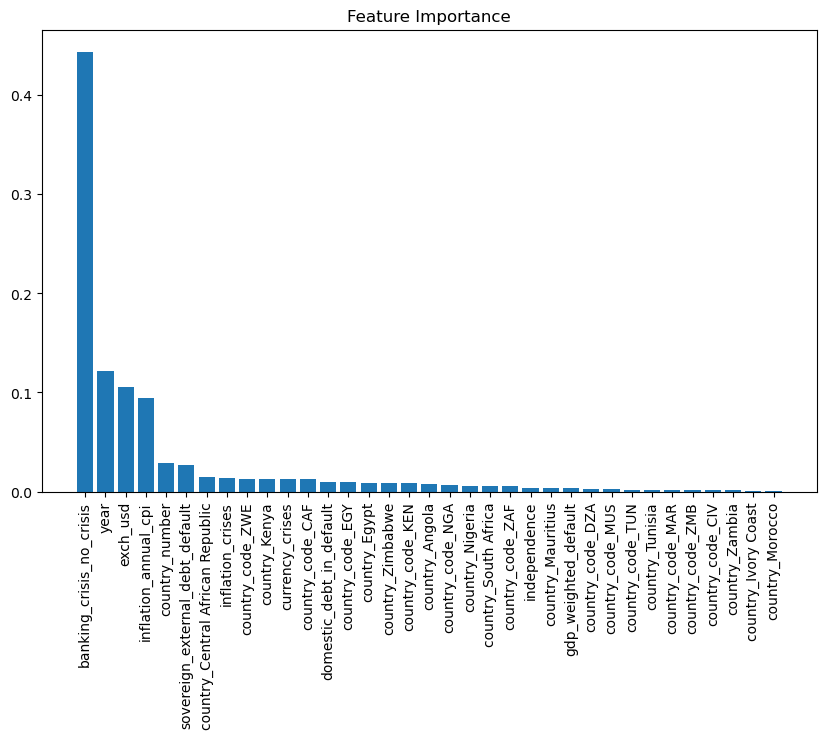

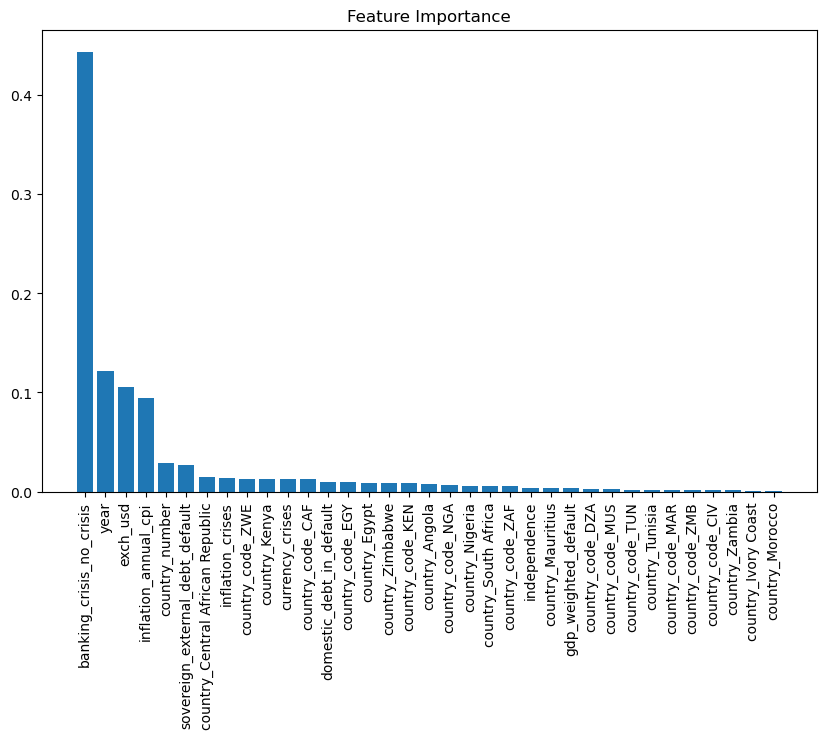

In [82]:
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()